In [2]:
# ---------------------------
# STEP 1: IMPORT LIBRARIES
# ---------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12,6)

# ---------------------------
# STEP 2: LOAD CLEANED DATA
# ---------------------------
train_file = "../data/cleaned/concatenated_training_cleaned.csv"
df_train = pd.read_csv(train_file)

# ---------------------------
# STEP 3: BASIC OVERVIEW
# ---------------------------
print("Training data shape:", df_train.shape)
print("Columns:", df_train.columns.tolist())
print(df_train.describe())

Training data shape: (123134, 25)
Columns: ['datetime', 'main_aqi', 'components_co', 'components_no', 'components_no2', 'components_o3', 'components_so2', 'components_pm2_5', 'components_pm10', 'components_nh3', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'precipitation', 'surface_pressure', 'wind_speed_10m', 'wind_direction_10m', 'shortwave_radiation', 'year', 'month', 'day', 'hour', 'day_of_week', 'is_weekend', 'season']
            main_aqi  components_co  components_no  components_no2  \
count  123134.000000  123134.000000  123134.000000   123134.000000   
mean        4.059374    1795.779186      17.487492       38.677333   
std         1.084070    2400.419802      48.158736       50.447881   
min         1.000000     150.200000       0.000000        0.340000   
25%         3.000000     453.950000       0.000000        6.940000   
50%         4.000000     867.840000       0.420000       18.160000   
75%         5.000000    1949.310000       5.700000       50.720000   

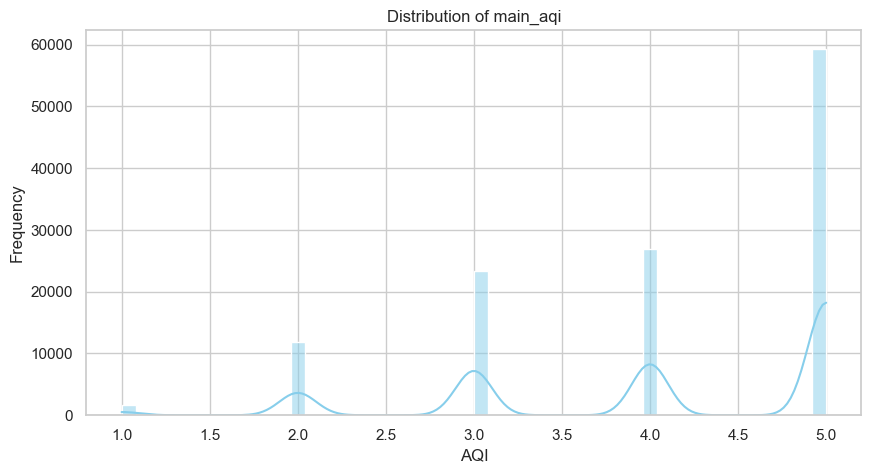

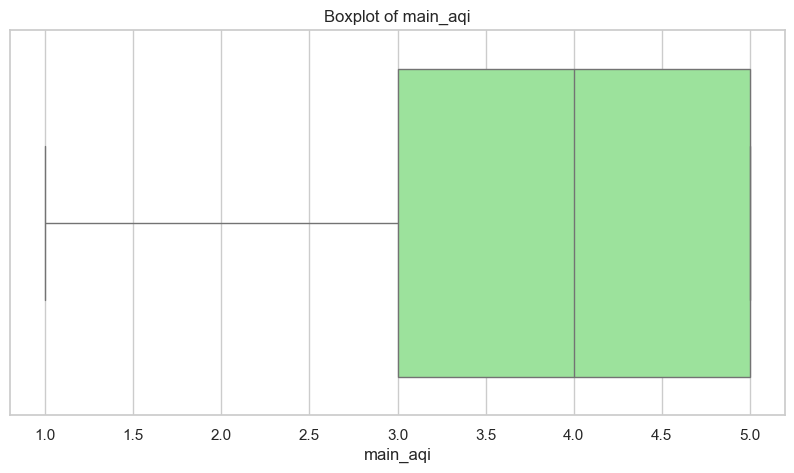

In [3]:
# ---------------------------
# STEP 4: TARGET VARIABLE ANALYSIS
# ---------------------------
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(df_train['main_aqi'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of main_aqi")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

# Boxplot for outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['main_aqi'], color='lightgreen')
plt.title("Boxplot of main_aqi")
plt.show()

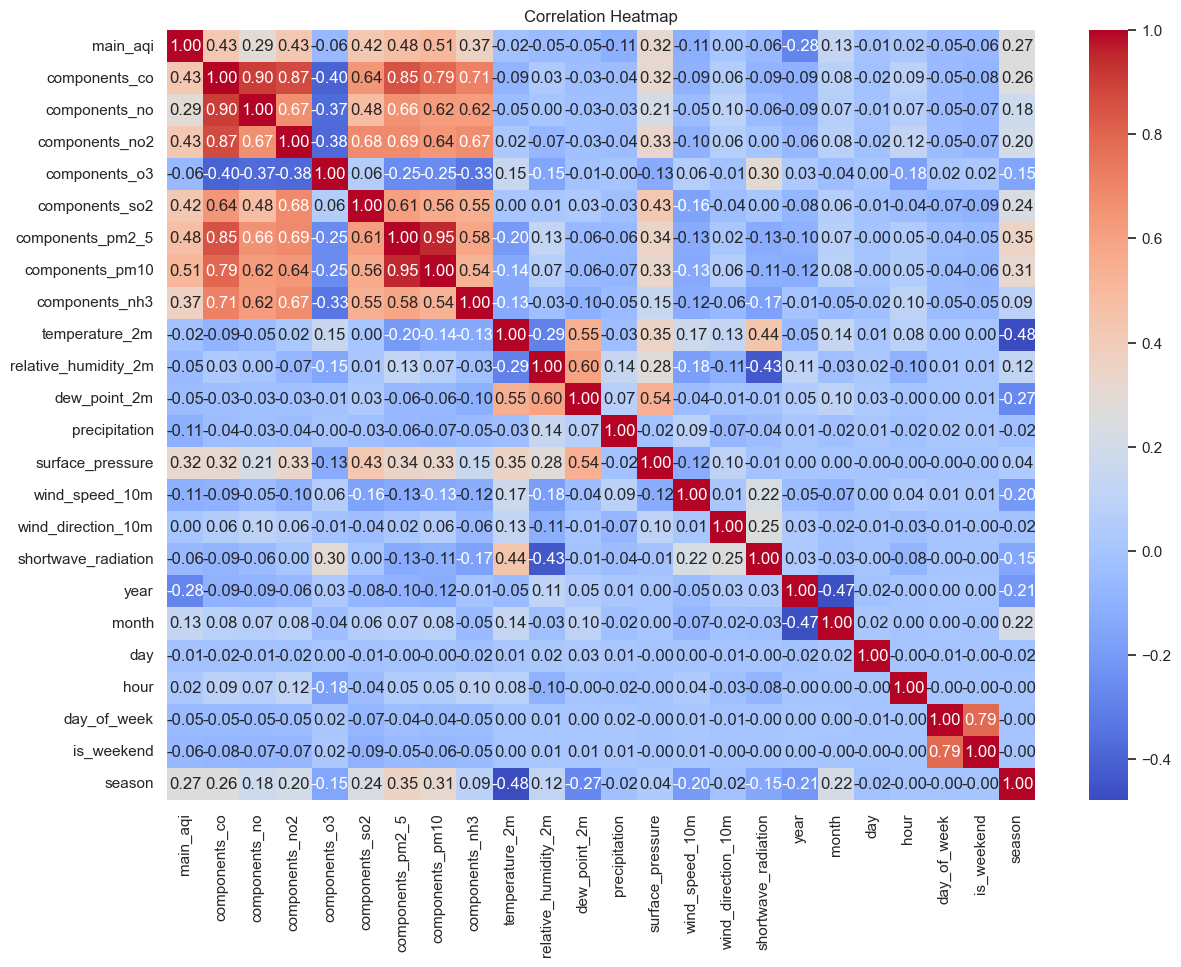

In [5]:
# ---------------------------
# STEP 5: CORRELATION ANALYSIS
# ---------------------------
df_train = df_train.drop(columns=['datetime']) #dropping datetime column
corr = df_train.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

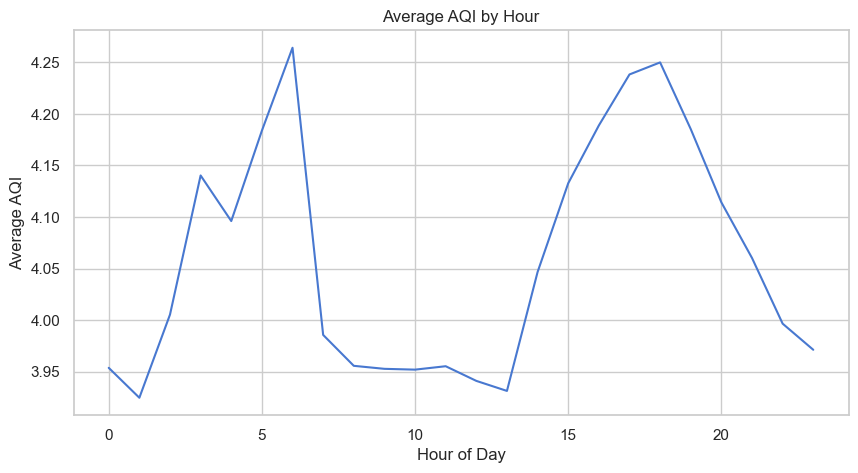

C:\Users\HT COMPUTERS\AppData\Local\Temp\ipykernel_13512\89503335.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


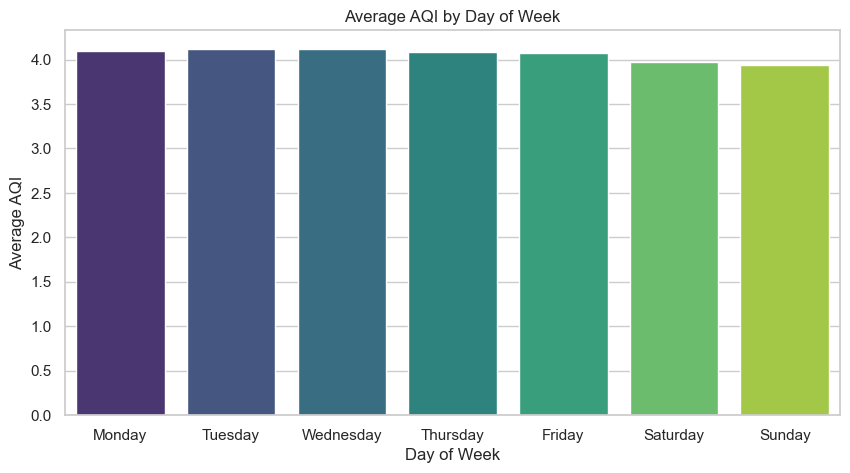

C:\Users\HT COMPUTERS\AppData\Local\Temp\ipykernel_13512\89503335.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


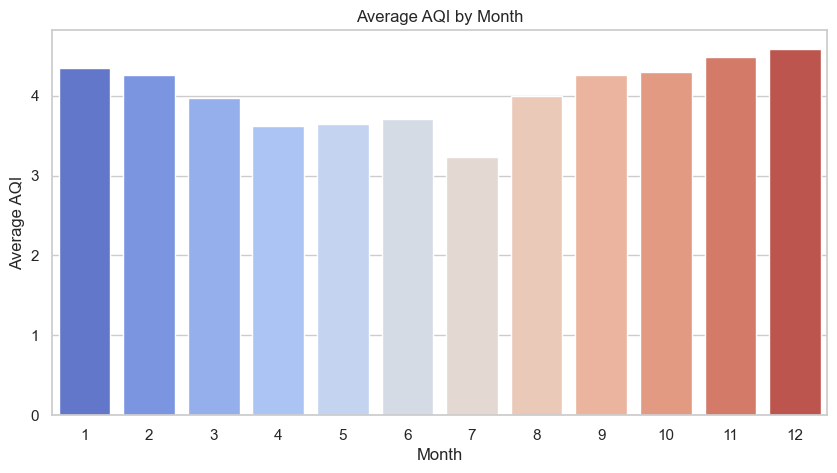

C:\Users\HT COMPUTERS\AppData\Local\Temp\ipykernel_13512\89503335.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


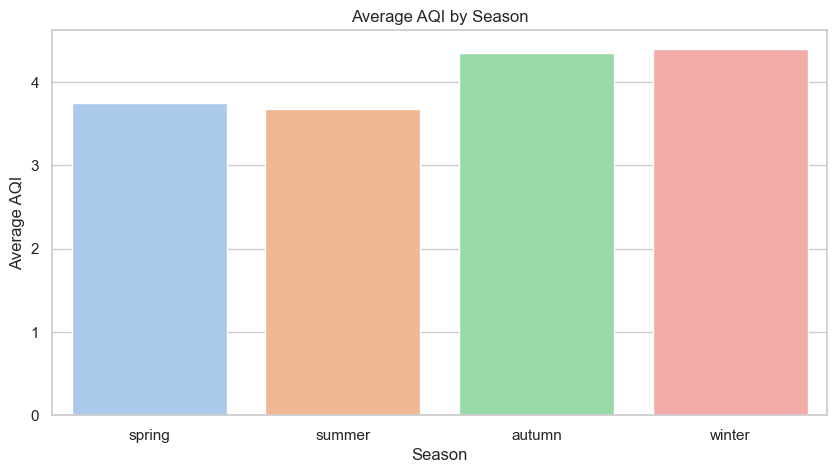

C:\Users\HT COMPUTERS\AppData\Local\Temp\ipykernel_13512\89503335.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


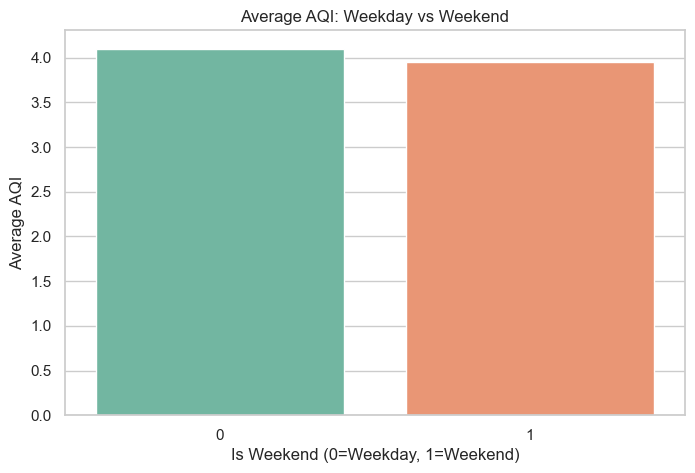

In [10]:
# ---------------------------
# STEP 6: TIME-BASED PATTERNS (Using numeric time features)
# ---------------------------

# Average AQI by Hour
plt.figure(figsize=(10,5))
sns.lineplot(
    x='hour', 
    y='main_aqi', 
    data=df_train.groupby('hour')['main_aqi'].mean().reset_index()
)
plt.title("Average AQI by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average AQI")
plt.show()

# Average AQI by Day of Week
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
day_avg = df_train.groupby('day_of_week')['main_aqi'].mean().reset_index()
day_avg['day_name'] = day_avg['day_of_week'].map(day_map)

# Plot with day names
plt.figure(figsize=(10,5))
sns.barplot(
    x='day_name', 
    y='main_aqi', 
    data=day_avg, 
    palette="viridis"
)
plt.title("Average AQI by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average AQI")
plt.show()

# Average AQI by Month
plt.figure(figsize=(10,5))
sns.barplot(
    x='month', 
    y='main_aqi', 
    data=df_train.groupby('month')['main_aqi'].mean().reset_index(), 
    palette="coolwarm"
)
plt.title("Average AQI by Month")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.show()

# Mapping numeric codes back to season names
season_map = {0: 'spring', 1: 'summer', 2: 'autumn', 3: 'winter'}
season_avg = df_train.groupby('season')['main_aqi'].mean().reset_index()
season_avg['season_name'] = season_avg['season'].map(season_map)

# Plot with season names
plt.figure(figsize=(10,5))
sns.barplot(
    x='season_name', 
    y='main_aqi', 
    data=season_avg, 
    palette="pastel"
)
plt.title("Average AQI by Season")
plt.xlabel("Season")
plt.ylabel("Average AQI")
plt.show()

# Average AQI by Weekend vs Weekday
plt.figure(figsize=(8,5))
sns.barplot(
    x='is_weekend', 
    y='main_aqi', 
    data=df_train.groupby('is_weekend')['main_aqi'].mean().reset_index(), 
    palette="Set2"
)
plt.title("Average AQI: Weekday vs Weekend")
plt.xlabel("Is Weekend (0=Weekday, 1=Weekend)")
plt.ylabel("Average AQI")
plt.show()

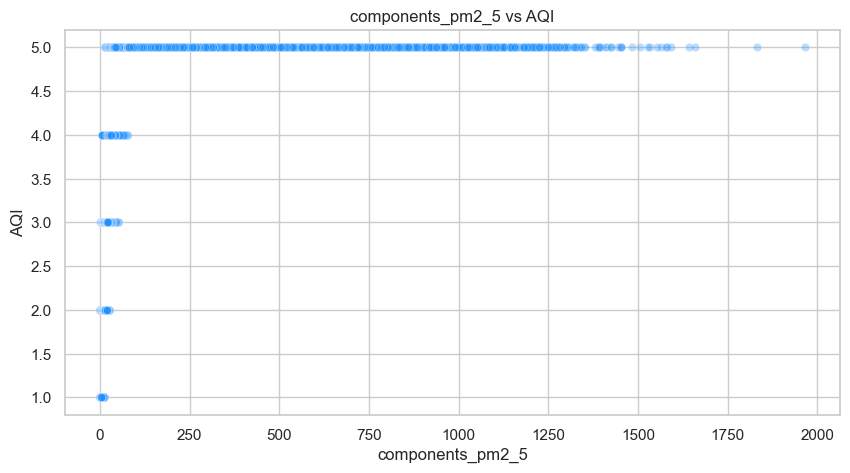

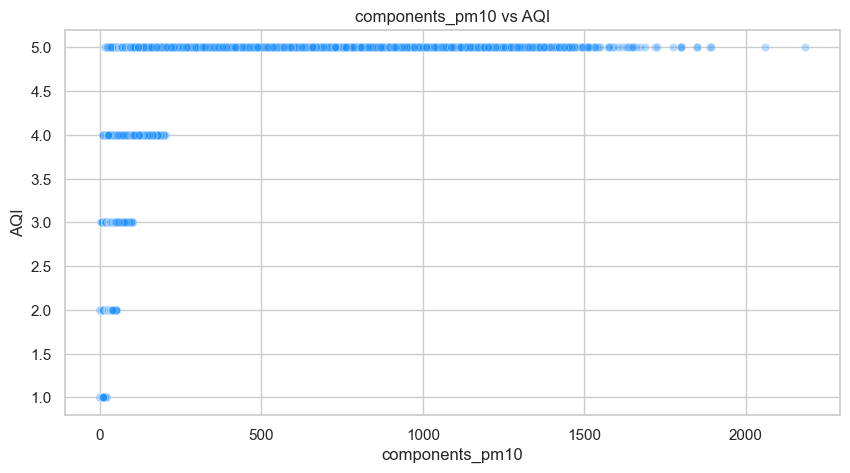

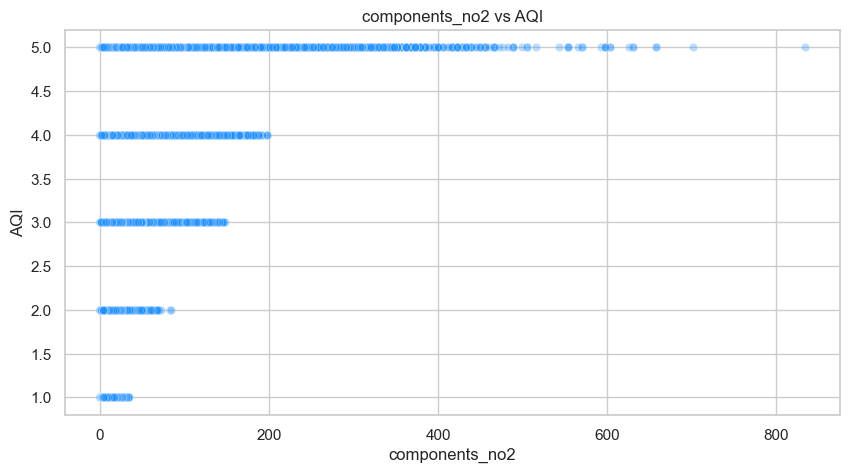

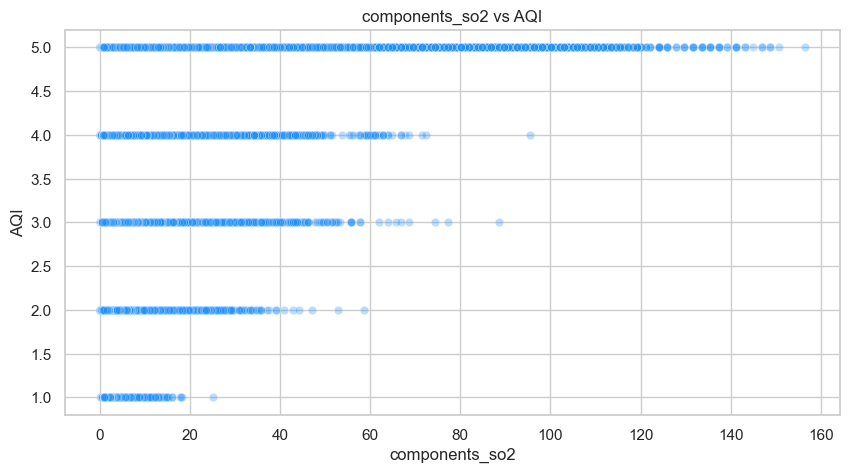

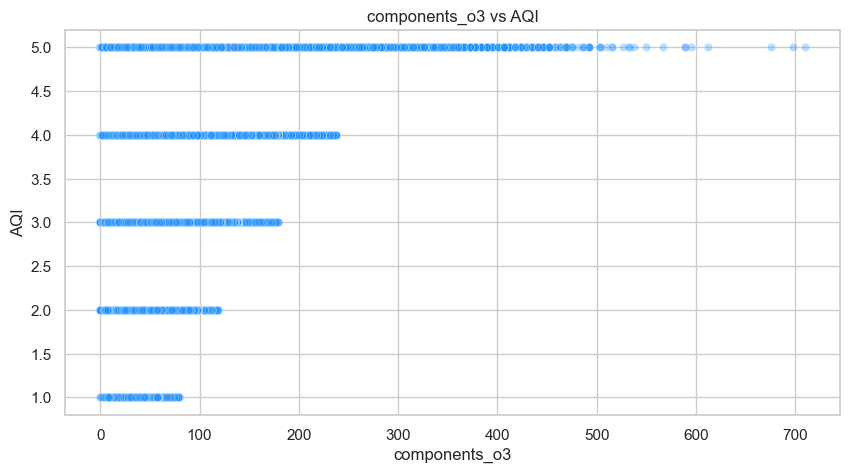

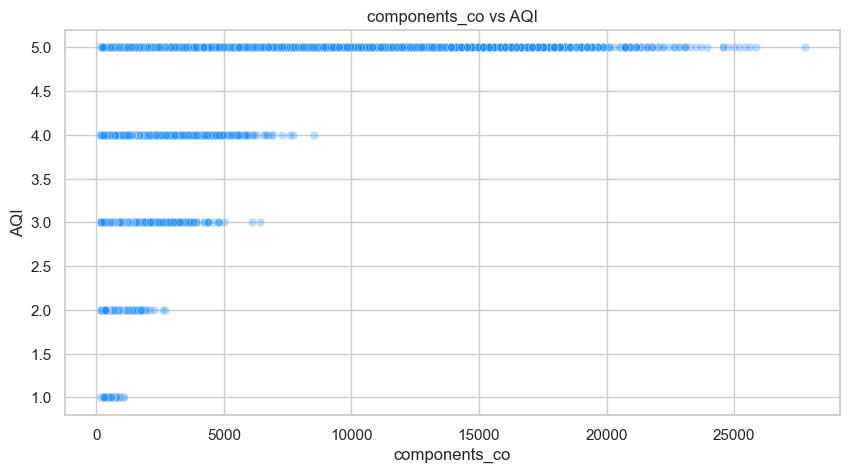

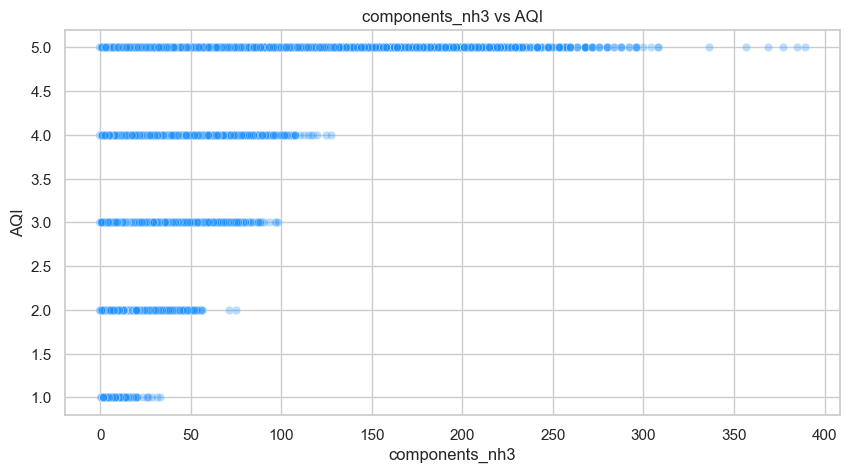

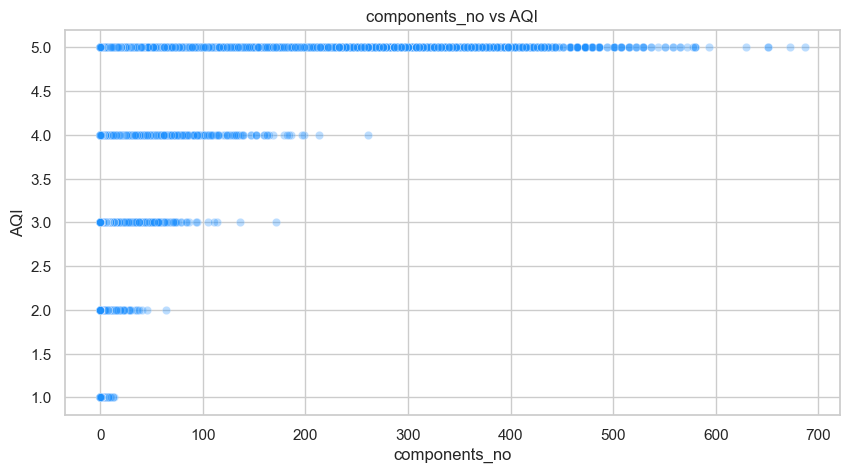

In [11]:
# ---------------------------
# STEP 7: POLLUTANT VS AQI
# Purpose: Visualize relationship between each pollutant and AQI
# ---------------------------
pollutants = [
    'components_pm2_5', 'components_pm10', 'components_no2', 
    'components_so2', 'components_o3', 'components_co', 
    'components_nh3', 'components_no'
]

for pollutant in pollutants:
    plt.figure(figsize=(10,5))
    sns.scatterplot(
        x=pollutant, 
        y='main_aqi', 
        data=df_train, 
        alpha=0.3,
        color='dodgerblue'
    )
    plt.title(f"{pollutant} vs AQI")
    plt.xlabel(pollutant)
    plt.ylabel("AQI")
    plt.show()

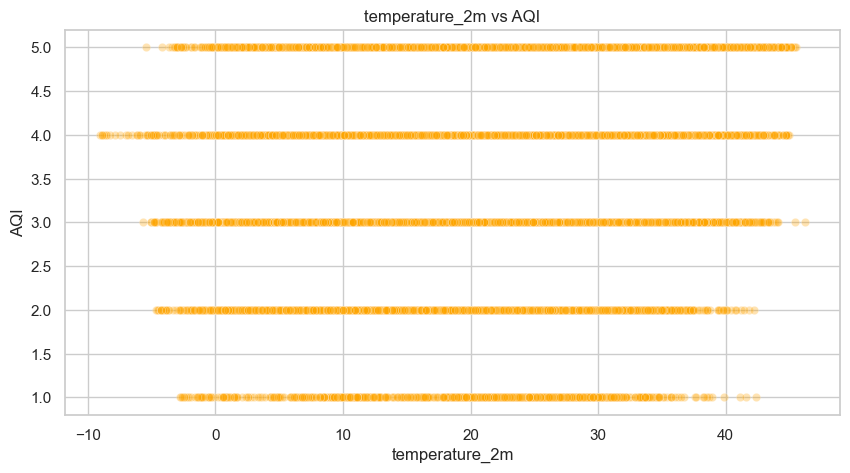

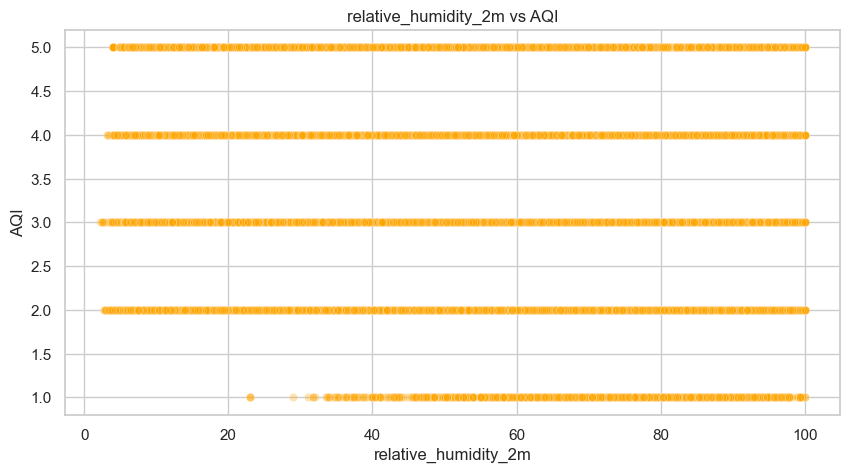

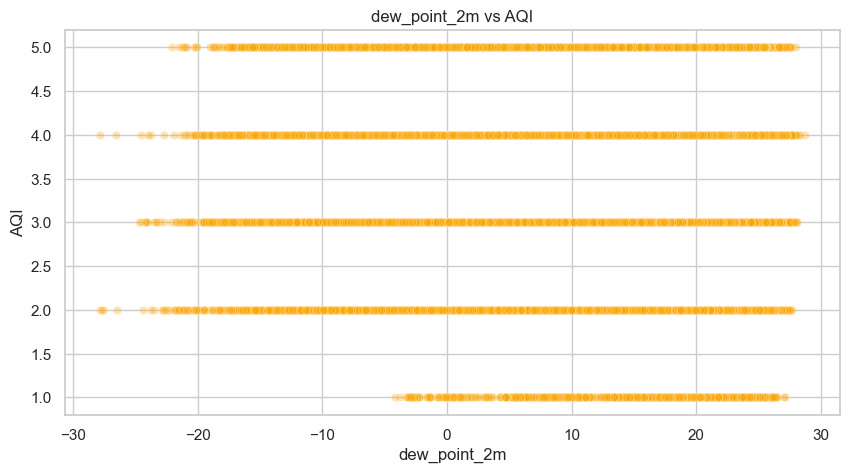

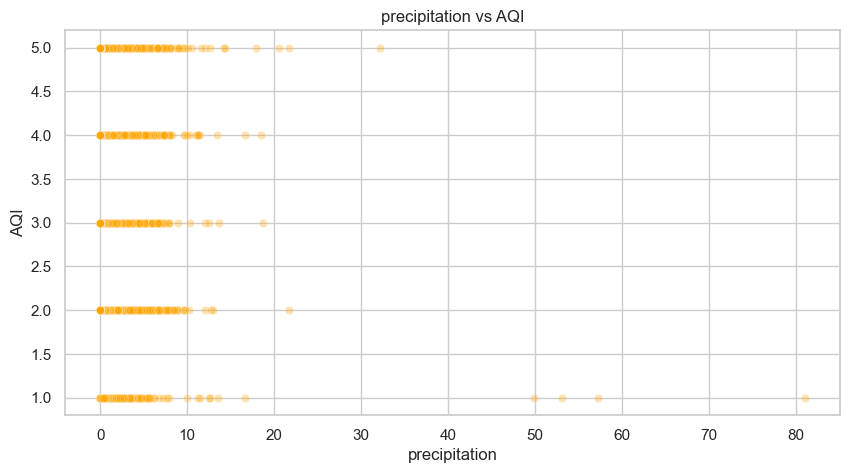

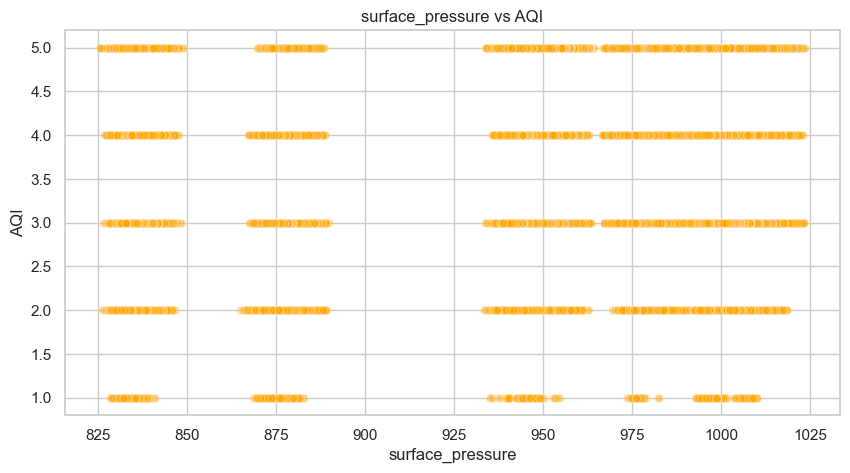

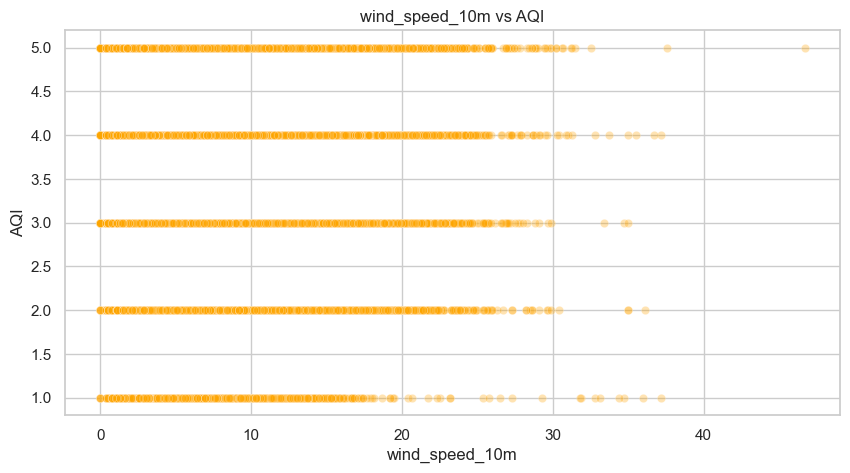

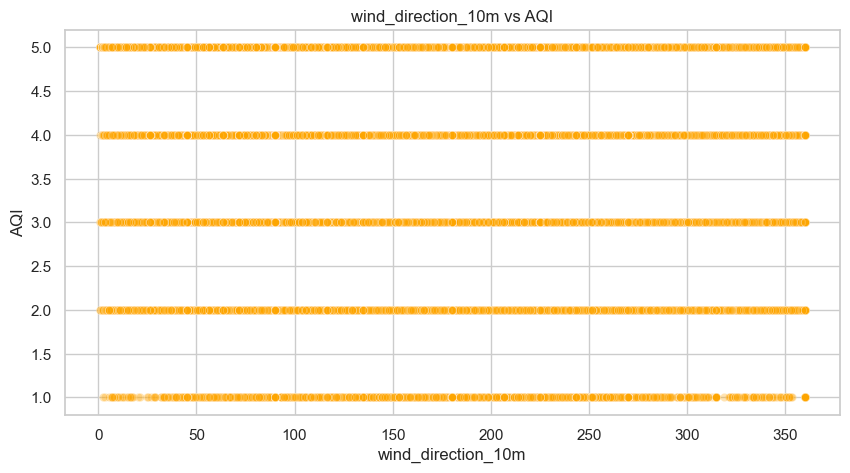

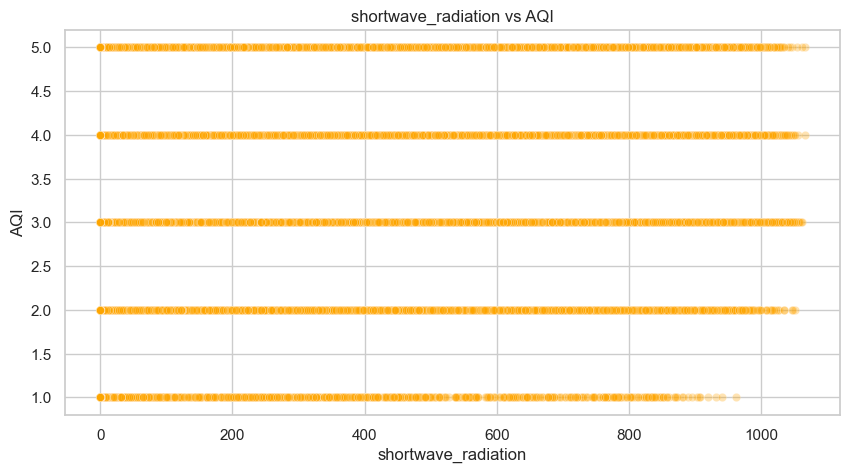

In [12]:
# ---------------------------
# STEP 8: WEATHER FEATURES VS AQI
# Purpose: Visualize how weather features impact AQI
# ---------------------------
weather_features = [
    'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 
    'precipitation', 'surface_pressure', 'wind_speed_10m', 
    'wind_direction_10m', 'shortwave_radiation'
]

for feature in weather_features:
    plt.figure(figsize=(10,5))
    sns.scatterplot(
        x=feature, 
        y='main_aqi', 
        data=df_train, 
        alpha=0.3,
        color='orange'
    )
    plt.title(f"{feature} vs AQI")
    plt.xlabel(feature)
    plt.ylabel("AQI")
    plt.show()